<a href="https://colab.research.google.com/github/hmyrcmn/GlobalAiProjects/blob/main/DogCNNglobalAiHubAygazProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Creating a Google Colaboratory File AN UPLOAD DATASET FROM KAGGLE

Proje için gerekli veri seti api key ile colab  ortamına getirildi .


In [1]:
# 1. Kaggle API anahtarını yükleyin
from google.colab import files
files.upload()

# 2. API anahtarını taşıyın ve gizli bir şekilde saklayın
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 3. Veri setini indirin
!kaggle datasets download -d amandam1/120-dog-breeds-breed-classification

# 4. Veri setini çıkartın
!unzip 120-dog-breeds-breed-classification.zip



Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: Images/n02108089-boxer/n02108089_11687.jpg  
  inflating: Images/n02108089-boxer/n02108089_117.jpg  
  inflating: Images/n02108089-boxer/n02108089_11807.jpg  
  inflating: Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: Images/n02108089-boxer/n02108089_122.jpg  
  inflating: Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: Images/n02108089-boxer/n02108089_125.jpg  
  inflating: Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: Images/n02108089-boxer/n02108089_13526.jpg  
  inflating: Images/n02108089-boxer/n02108089_1353.jpg  
  inflating: Images/n02108089-boxer/n02108089_1355.jpg  
  inflating: Images/n02108089-boxer/n02108089_1357.jpg  
  inflating: Images/n02108089-boxer/n02108089_1367.jpg  
  inflating: Images/n02108089-boxer

# Importing Required Libraries


In [10]:
# Importing Required Libraries
# Install required libraries
!pip install pandas numpy seaborn matplotlib scikit-learn tensorflow

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
# Veri setinin bulunduğu klasör
data_folder = "/content/Images/"

# Veri setinin bir DataFrame'e yüklenmesi
data = []

for label in os.listdir(data_folder):
    label_folder = os.path.join(data_folder, label)
    if os.path.isdir(label_folder):
        for image_name in os.listdir(label_folder):
            data.append({"Image_Path": os.path.join(label, image_name), "Label": label})

df = pd.DataFrame(data)
#verinin ilk 5 i
df.head()

,Image_Path,Label
0,n02110627-affenpinscher/n02110627_13590.jpg,n02110627-affenpinscher
1,n02110627-affenpinscher/n02110627_10439.jpg,n02110627-affenpinscher
2,n02110627-affenpinscher/n02110627_8621.jpg,n02110627-affenpinscher
3,n02110627-affenpinscher/n02110627_12973.jpg,n02110627-affenpinscher
4,n02110627-affenpinscher/n02110627_13553.jpg,n02110627-affenpinscher


In [12]:
df.shape # metadata verinin boyutu 2 sutun ve 20580 satırdan oluşuyor
#data is include 2columns and 20580 rows

(20580, 2)

In [13]:
# Kategorik hedefi Label Encoding kullanarak sayısallaştırın
label_encoder = LabelEncoder()
df["Encoded_Label"] = label_encoder.fit_transform(df["Label"])
num_classes = len(label_encoder.classes_)
num_classes #toplam 120 çeşit classvar

120

In [14]:
df.head() #first 5 img from dataset

,Image_Path,Label,Encoded_Label
0,n02110627-affenpinscher/n02110627_13590.jpg,n02110627-affenpinscher,100
1,n02110627-affenpinscher/n02110627_10439.jpg,n02110627-affenpinscher,100
2,n02110627-affenpinscher/n02110627_8621.jpg,n02110627-affenpinscher,100
3,n02110627-affenpinscher/n02110627_12973.jpg,n02110627-affenpinscher,100
4,n02110627-affenpinscher/n02110627_13553.jpg,n02110627-affenpinscher,100


In [15]:
df.tail() #last 5 img from dataset

,Image_Path,Label,Encoded_Label
20575,n02109525-Saint_Bernard/n02109525_6215.jpg,n02109525-Saint_Bernard,96
20576,n02109525-Saint_Bernard/n02109525_10251.jpg,n02109525-Saint_Bernard,96
20577,n02109525-Saint_Bernard/n02109525_345.jpg,n02109525-Saint_Bernard,96
20578,n02109525-Saint_Bernard/n02109525_7656.jpg,n02109525-Saint_Bernard,96
20579,n02109525-Saint_Bernard/n02109525_4516.jpg,n02109525-Saint_Bernard,96


In [16]:
from sklearn.model_selection import train_test_split

# Veri setini eğitim, test ve doğrulama setlerine bölün
X_train, X_temp, y_train, y_temp = train_test_split(df["Image_Path"], df["Encoded_Label"], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


#resize and split

In [40]:
import cv2
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Veri setini yükleme
data_folder = "/content/Images"

file_paths = []
labels = []

count=0
for folder_name in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder_name)
    if (os.path.isdir(folder_path)) and (count<1000):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            file_paths.append(file_path)
            labels.append(folder_name)
            count+=1

df = pd.DataFrame({'Image_Path': file_paths, 'Label': labels})

# Veri setini bölme
X_temp, X_test, y_temp, y_test = train_test_split(df['Image_Path'], df['Label'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Resimleri yükleyip yeniden boyutlandırma
def load_and_preprocess_image(image_path, target_shape):
    try:
        img = cv2.imread(image_path)

        if img is None or img.size == 0:
            print(f"Hata: Resim yüklenemedi veya boş - {image_path}")
            return None

        img = cv2.resize(img, (target_shape[1], target_shape[0]))  # Resize the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = img / 255.0  # Normalize pixel values
        return img

    except Exception as e:
        print(f"Hata: {e}")
        return None

# Eğitim seti
X_train_resized = np.array([load_and_preprocess_image(image_path, target_shape=(128, 128, 3)) for image_path in X_train])
# Doğrulama seti
X_val_resized = np.array([load_and_preprocess_image(image_path, target_shape=(128, 128, 3)) for image_path in X_val])

# Test seti
X_test_resized = np.array([load_and_preprocess_image(image_path, target_shape=(128, 128, 3)) for image_path in X_test])


# Etiketleri kodlama
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# # One-Hot Encoding
# y_train_onehot = to_categorical(y_train_encoded)
# y_val_onehot = to_categorical(y_val_encoded)
# y_test_onehot = to_categorical(y_test_encoded)


In [44]:
# Ek kontrol
print("X_train_resized shape:", X_train_resized.shape)
print("X_val_resized shape:", X_val_resized.shape)
print("X_test_resized shape:", X_test_resized.shape)



X_train_resized shape: (660, 128, 128, 3)
X_val_resized shape: (220, 128, 128, 3)
X_test_resized shape: (221, 128, 128, 3)


#4.adım :

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Modeli oluştur
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Model özetini görüntüle
model.summary()
# Modeli eğit
history = model.fit(X_train_resized, y_train_encoded, epochs=1, validation_data=(X_val_resized, y_val_encoded))


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_6 (Flatten)         (None, 50176)            

In [47]:
history = model.fit(X_train_resized, y_train_encoded, epochs=10, validation_data=(X_val_resized, y_val_encoded))


Epoch 1/10
21/21 [==============================] - 26s 1s/step - loss: 1.8386 - accuracy: 0.2439 - val_loss: 1.5765 - val_accuracy: 0.4227
Epoch 2/10
21/21 [==============================] - 24s 1s/step - loss: 1.6865 - accuracy: 0.3136 - val_loss: 1.4565 - val_accuracy: 0.4909
Epoch 3/10
21/21 [==============================] - 25s 1s/step - loss: 1.5113 - accuracy: 0.3848 - val_loss: 1.3620 - val_accuracy: 0.5182
Epoch 4/10
21/21 [==============================] - 26s 1s/step - loss: 1.4076 - accuracy: 0.4318 - val_loss: 1.3282 - val_accuracy: 0.5227
Epoch 5/10
21/21 [==============================] - 23s 1s/step - loss: 1.3038 - accuracy: 0.4985 - val_loss: 1.2936 - val_accuracy: 0.4909
Epoch 6/10
21/21 [==============================] - 25s 1s/step - loss: 1.1775 - accuracy: 0.5485 - val_loss: 1.3017 - val_accuracy: 0.5409
Epoch 7/10
21/21 [==============================] - 26s 1s/step - loss: 1.0721 - accuracy: 0.5985 - val_loss: 1.3618 - val_accuracy: 0.5000
Epoch 8/10
21/21 [==

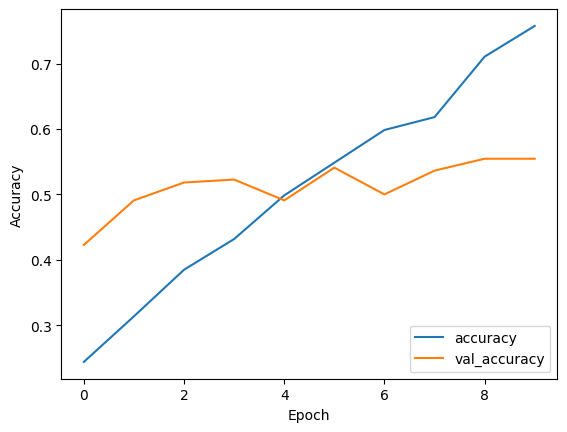

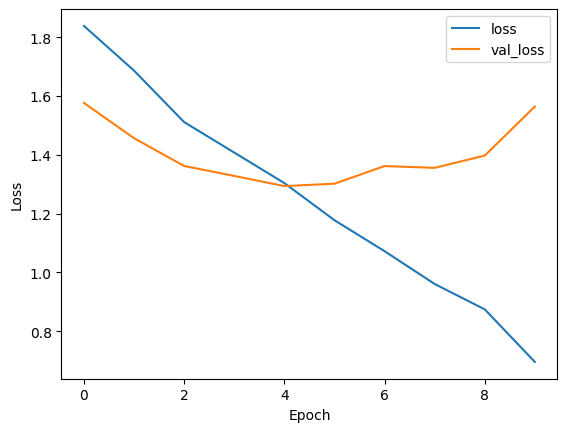

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_6 (Flatten)         (None, 50176)            

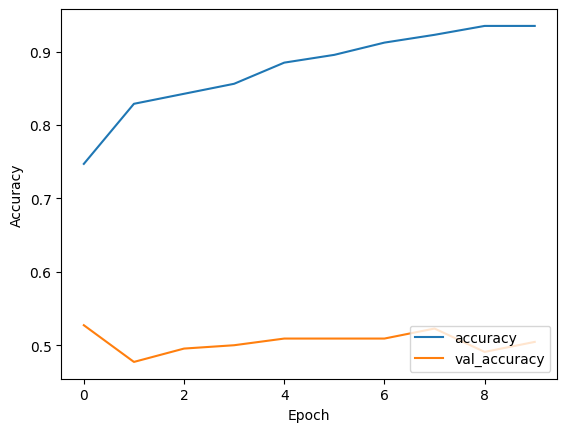

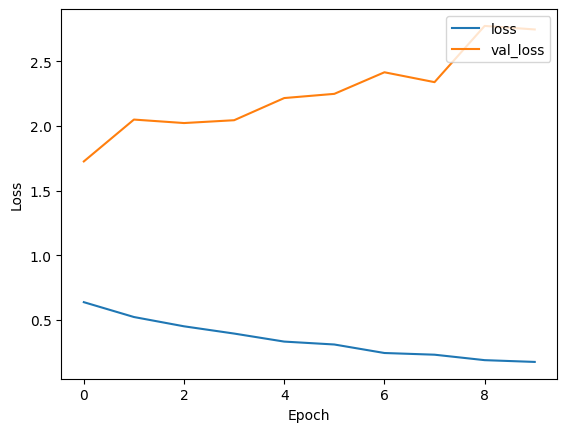

In [50]:
# Eğitim sonuçlarını görselleştir
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model özetini görüntüle
model.summary()

# Modeli eğit
history = model.fit(X_train_resized, y_train_encoded, epochs=10, validation_data=(X_val_resized, y_val_encoded))

# Eğitim sonuçlarını görselleştir
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

5. adım


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Keras modelini sarmalayacak bir fonksiyon oluştur
def create_model(conv1_filters, conv1_kernel_size, conv2_filters, conv2_kernel_size, dense_units, dropout_rate):
    model = models.Sequential()
    model.add(layers.Conv2D(conv1_filters, conv1_kernel_size, activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(conv2_filters, conv2_kernel_size, activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# KerasClassifier ile scikit-learn uyumlu modeli oluştur
keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Random Search için parametre aralıklarını belirle
param_dist = {
    'conv1_filters': [16, 32, 64],
    'conv1_kernel_size': [(3, 3), (5, 5)],
    'conv2_filters': [32, 64, 128],
    'conv2_kernel_size': [(3, 3), (5, 5)],
    'dense_units': [64, 128, 256],
    'dropout_rate': [0.2, 0.5, 0.7]
}

# Random Search modelini oluştur ve fit et
random_search = RandomizedSearchCV(keras_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train_resized, y_train_encoded)

# En iyi Hiperparametreleri göster
print("En İyi Hiperparametreler:", random_search.best_params_)

# Optimize edilmiş modeli al
optimized_model = random_search.best_estimator_


<ipython-input-54-907be80bd096>:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


5/5 [==============================] - 2s 350ms/step
